# Importing Dataset

In [ ]:
import pandas as pd
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten the image data (28x28 images) into a 1D array of 784 values
X_train_flattened = X_train.reshape(X_train.shape[0], 28 * 28)
X_test_flattened = X_test.reshape(X_test.shape[0], 28 * 28)

# Create DataFrames for train and test data
df_train = pd.DataFrame(X_train_flattened)
df_test = pd.DataFrame(X_test_flattened)

# Add the labels to the DataFrames
df_train['label'] = y_train
df_test['label'] = y_test

# Display the first few rows of the training DataFrame
print(df_train.head())


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
   0  1  2  3  4  5  6  7   8   9  ...  775  776  777  778  779  780  781  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  114  130   76    0    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    1    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   782  783  label  
0    0    0      9  
1    0    0      0  
2    0    0      0  
3    0    0      3  
4    0    0      0  

[5 rows x 785 columns]


In [ ]:
df_train.shape

(60000, 785)

In [ ]:
df_test.shape

(10000, 785)

- Each row is an item of clothing
- Each column or feature is a pixel value.

1- Build 3 baseines with different kernals (Linear..)
2. Pick the best kernal and don't change it
3- Kbest, nmodel with best Kernal
4. Lasso, model with best kernal
4. Dt, model with best kernal
5. PCA
6. PCA with best kernal
8. Evalue all models

# SVM Baseline Models

## Sigmoid

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Initialize an SVM classifier with the sigmoid kernel
svm_classifier = SVC(kernel='sigmoid')

# Train the model in batches of 5000
batch_size = 5000
n_batches = X_train_flattened.shape[0] // batch_size

for i in range(n_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    print(f"Training batch {i+1}/{n_batches}")

    # Extract the current batch
    X_batch = X_train_flattened[start:end]
    y_batch = y_train[start:end]

    # Fit the model on the current batch
    svm_classifier.fit(X_batch, y_batch)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_flattened)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Training batch 1/12
Training batch 2/12
Training batch 3/12
Training batch 4/12
Training batch 5/12
Training batch 6/12
Training batch 7/12
Training batch 8/12
Training batch 9/12
Training batch 10/12
Training batch 11/12
Training batch 12/12
Model Accuracy: 43.81%


Sample Predictions:
Actual labels:    [9 2 1 1 6 1 4 6 5 7]
Predicted labels: [8 5 1 1 8 3 6 8 5 7]


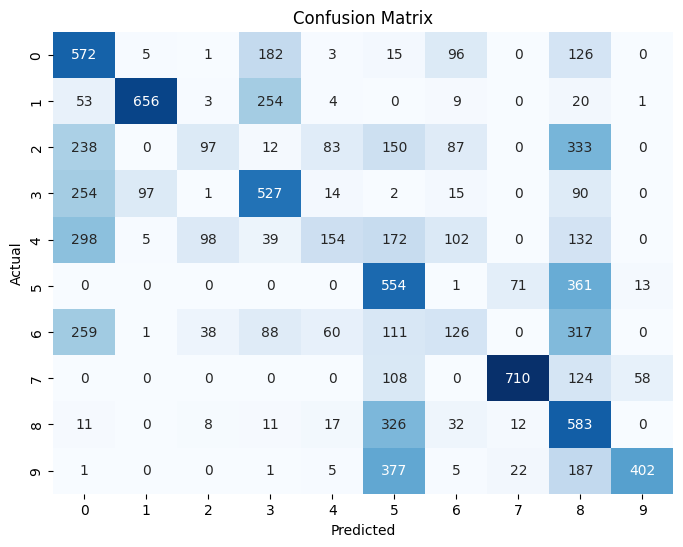

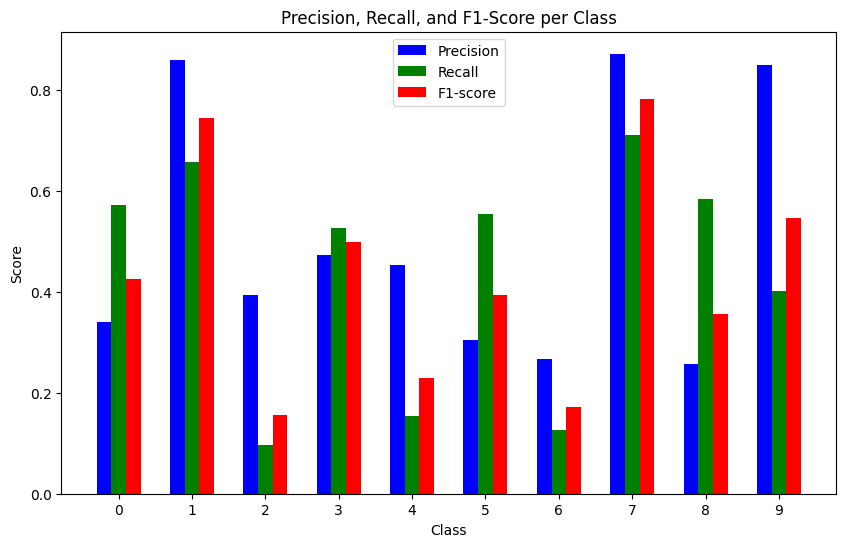

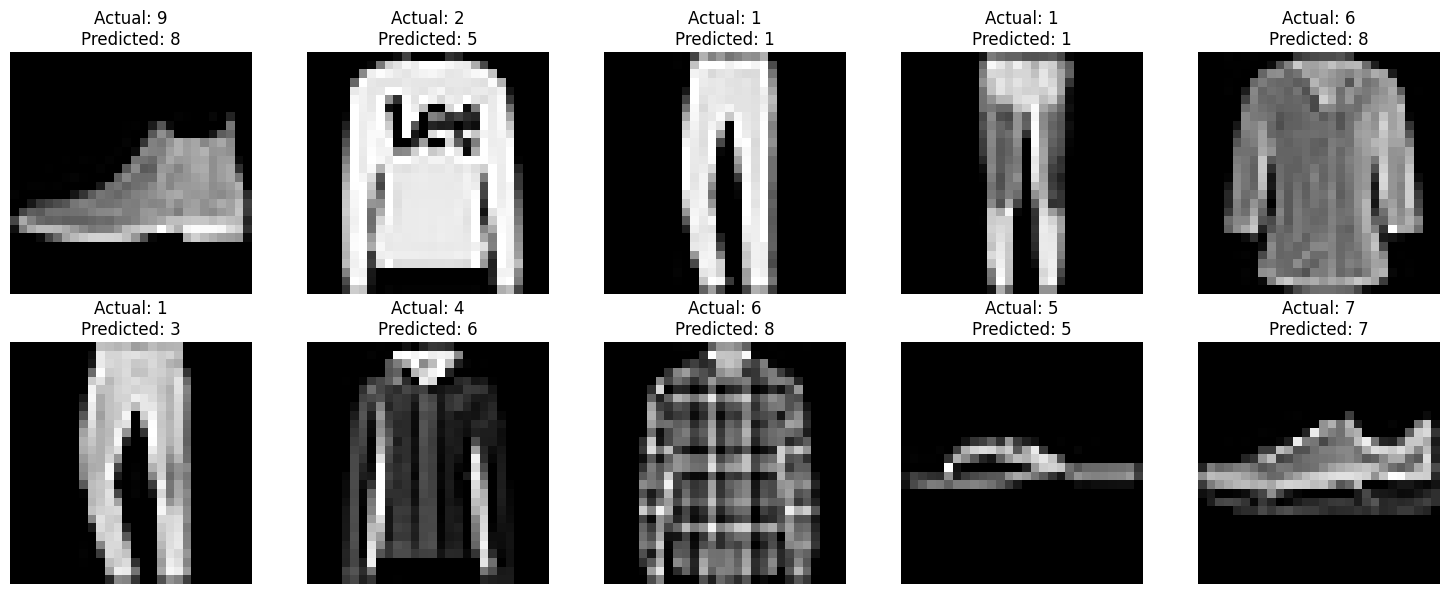

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
# Step 6: Display sample predictions
print("Sample Predictions:")
print("Actual labels:   ", y_test[:10])
print("Predicted labels:", y_pred[:10])

# Step 7: Generate and interpret a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 9: Create visualizations for precision, recall, and F1-score
classification_report_data = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [classification_report_data[str(i)]['precision'] for i in np.unique(y_test)]
recall = [classification_report_data[str(i)]['recall'] for i in np.unique(y_test)]
f1_score = [classification_report_data[str(i)]['f1-score'] for i in np.unique(y_test)]
classes = np.unique(y_test)

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='blue')
plt.bar(x, recall, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()

# Step 10: Display a selection of test images with actual and predicted labels
# Assuming X_test_flattened contains flattened images, reshape them for display purposes
# Here we assume the images are 28x28 pixels as in MNIST-like data
sample_images = X_test_flattened[:10].reshape(-1, 28, 28)  # Adjust shape if necessary
sample_actual_labels = y_test[:10]
sample_predicted_labels = y_pred[:10]

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Actual: {sample_actual_labels[i]}\nPredicted: {sample_predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In this context, the sigmoid kernel for your SVM model is not performing well, with an accuracy of 43.81%, which indicates that it is misclassifying most of the data. It correctly classified only 4 out of 10 labels in your example, meaning it struggles to identify the right classes.

Looking at the precision, recall and the f1 score graphs, it eveident that Label 1, Label 7, Label 5, Label 1 were predicted correclty as 1 being trousers, 7 being sneaker and 5 being a sandal. While label the other labels were misclassified. In the graph there is higher precision for Label 1, 7 and 9. Label 1 and 7 also have higher recall and f1 scores which show that these elements are predicting the most accurately while other labels and predicting lowerer metrics.

## Linear

In [ ]:
# Initialize an SVM classifier with the sigmoid kernel
svm_classifier = SVC(kernel='linear')

# Train the model in batches of 5000
batch_size = 5000
n_batches = X_train_flattened.shape[0] // batch_size

for i in range(n_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    print(f"Training batch {i+1}/{n_batches}")

    # Extract the current batch
    X_batch = X_train_flattened[start:end]
    y_batch = y_train[start:end]

    # Fit the model on the current batch
    svm_classifier.fit(X_batch, y_batch)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_flattened)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Training batch 1/12
Training batch 2/12
Training batch 3/12
Training batch 4/12
Training batch 5/12
Training batch 6/12
Training batch 7/12
Training batch 8/12
Training batch 9/12
Training batch 10/12
Training batch 11/12
Training batch 12/12
Model Accuracy: 80.02%


Sample Predictions (Linear Kernel):
Actual labels:    [9 2 1 1 6 1 4 6 5 7]
Predicted labels: [9 2 1 1 6 1 4 4 5 7]


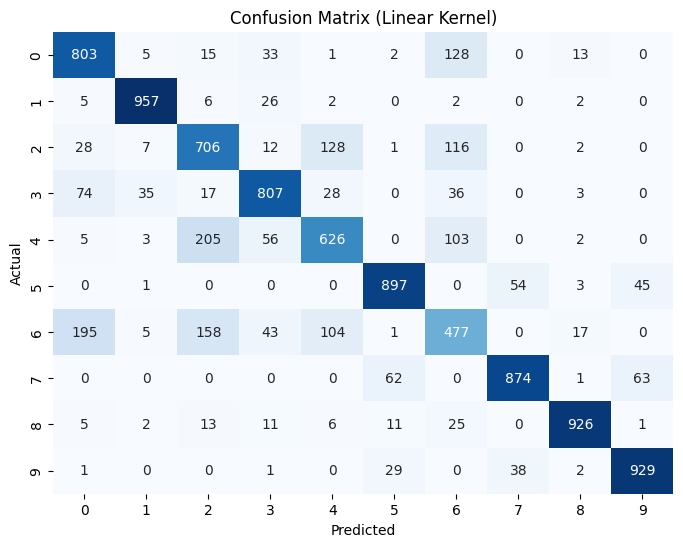

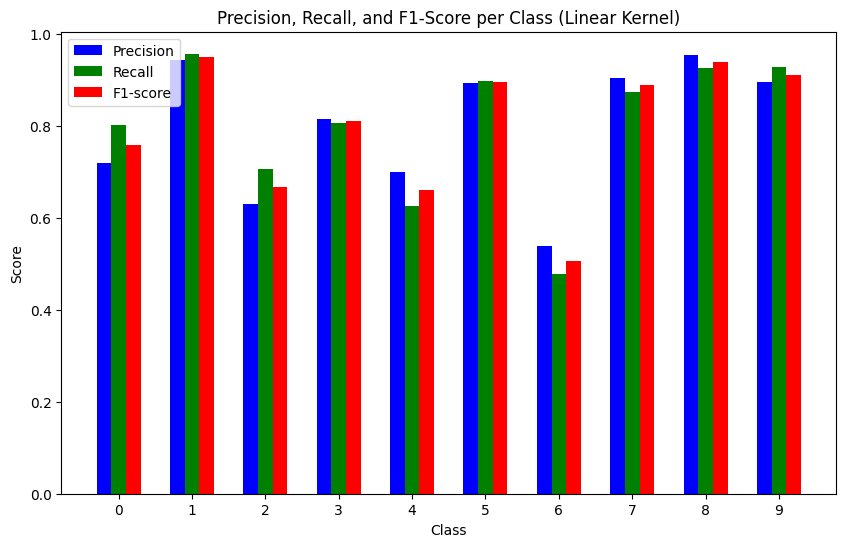

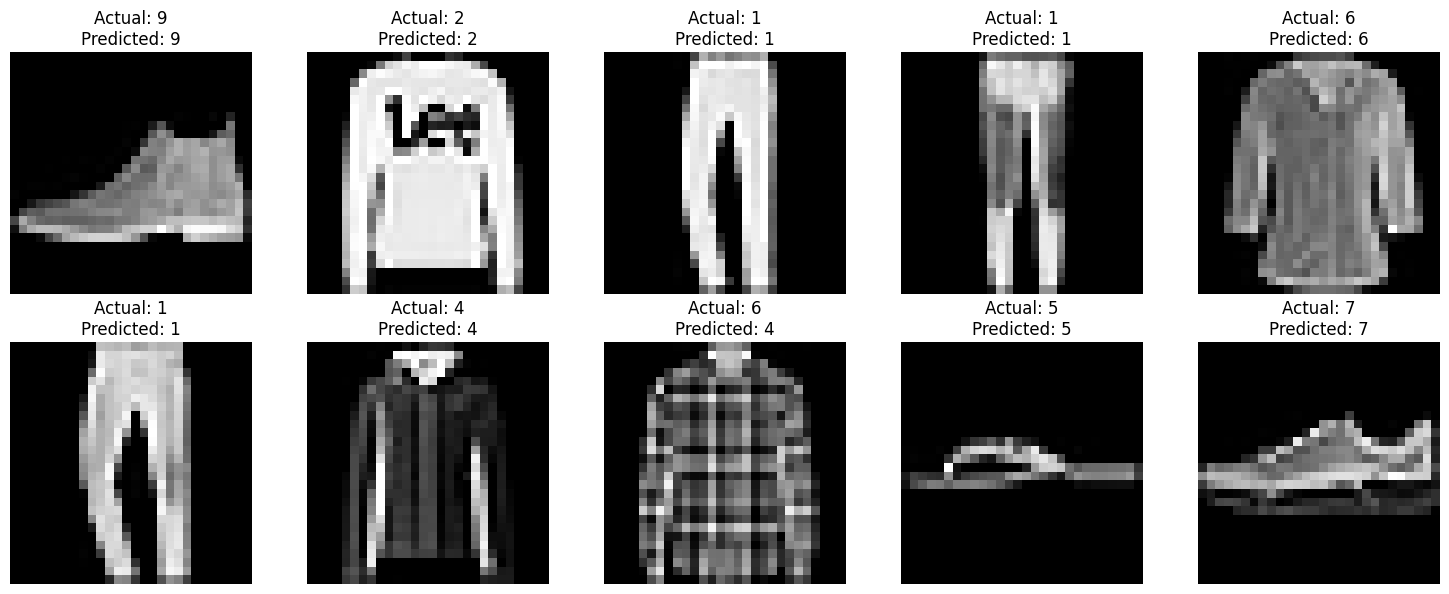

In [ ]:

# Step 6: Display sample predictions
print("Sample Predictions (Linear Kernel):")
print("Actual labels:   ", y_test[:10])
print("Predicted labels:", y_pred[:10])

# Step 7: Generate and interpret a confusion matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred)

# Step 8: Display the confusion matrix for linear kernel SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Linear Kernel)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 9: Create visualizations for precision, recall, and F1-score
classification_report_linear = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision_linear = [classification_report_linear[str(i)]['precision'] for i in np.unique(y_test)]
recall_linear = [classification_report_linear[str(i)]['recall'] for i in np.unique(y_test)]
f1_score_linear = [classification_report_linear[str(i)]['f1-score'] for i in np.unique(y_test)]
classes = np.unique(y_test)

# Plot precision, recall, and F1-score for linear kernel SVM
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision_linear, width=0.2, label='Precision', color='blue')
plt.bar(x, recall_linear, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score_linear, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class (Linear Kernel)')
plt.legend()
plt.show()

# Step 10: Display a selection of test images with actual and predicted labels (if applicable)
# Assuming X_test_flattened contains flattened images, reshape them for display purposes
# Here we assume the images are 28x28 pixels as in MNIST-like data
sample_images_linear = X_test_flattened[:10].reshape(-1, 28, 28)  # Adjust shape if necessary
sample_actual_labels_linear = y_test[:10]
sample_predicted_labels_linear = y_pred[:10]

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images_linear[i], cmap='gray')
    plt.title(f"Actual: {sample_actual_labels_linear[i]}\nPredicted: {sample_predicted_labels_linear[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

For this set of predictions, the linear kernel SVM model achieved 90% accuracy, correctly classifying 9 out of 10 labels. The only mistake was misclassifying 6 as 4, which could indicate that a linear decision boundary was insufficient to capture the distinction between these two classes in that instance. Overall, this shows the linear kernel performed quite well, but there could still be room for improvement with a more flexible kernel (like RBF) for harder-to-separate data points.

Assessing the precision, recall and f1 score, all the labels 1,2, 3, 4, 5, 7, 8, 9 have higher score between 0.6 and 1 while label 6 have lower metric score below 0.5.

## RBF

In [ ]:
# Initialize an SVM classifier with the sigmoid kernel
svm_classifier = SVC(kernel='rbf')

# Train the model in batches of 5000
batch_size = 5000
n_batches = X_train_flattened.shape[0] // batch_size

for i in range(n_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    print(f"Training batch {i+1}/{n_batches}")

    # Extract the current batch
    X_batch = X_train_flattened[start:end]
    y_batch = y_train[start:end]

    # Fit the model on the current batch
    svm_classifier.fit(X_batch, y_batch)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_flattened)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Training batch 1/12
Training batch 2/12
Training batch 3/12
Training batch 4/12
Training batch 5/12
Training batch 6/12
Training batch 7/12
Training batch 8/12
Training batch 9/12
Training batch 10/12
Training batch 11/12
Training batch 12/12
Model Accuracy: 83.28%


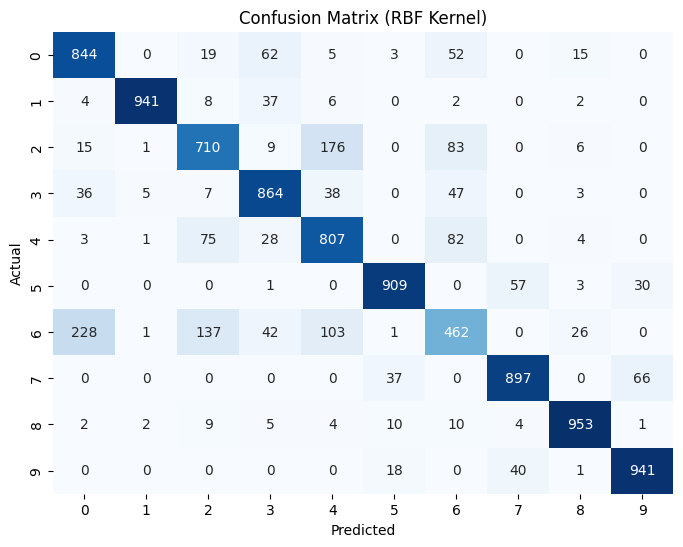

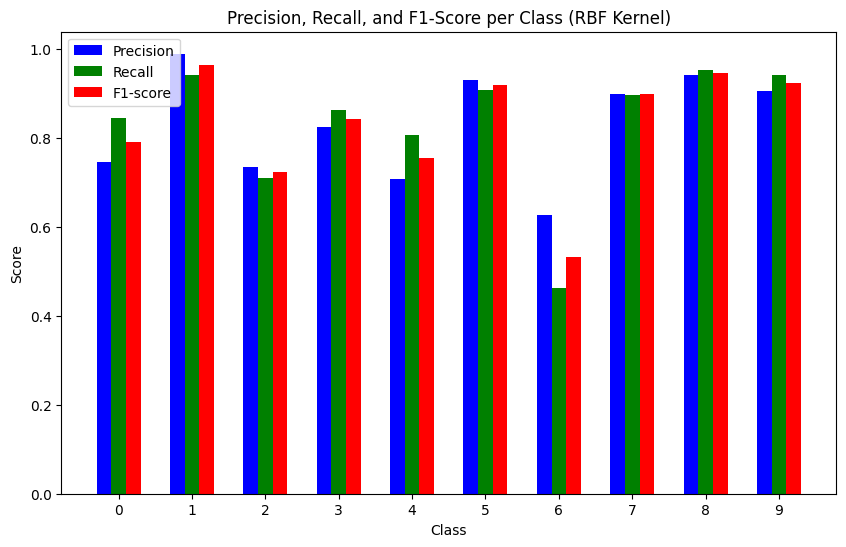

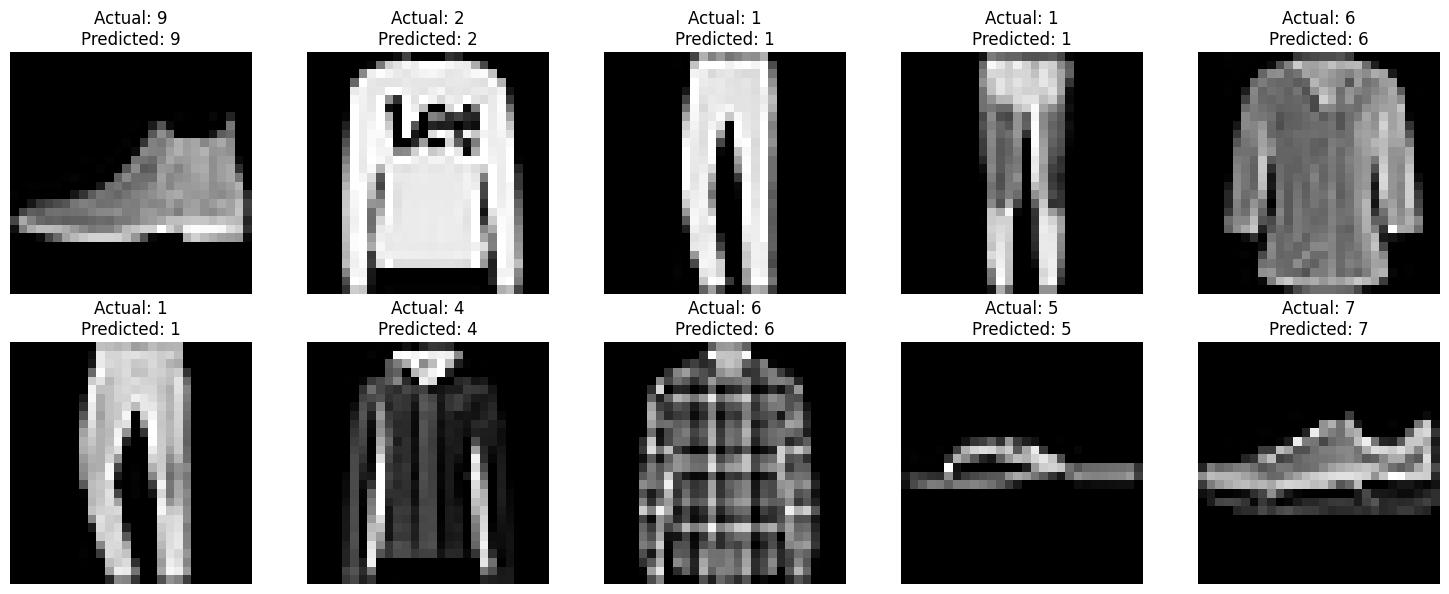

In [ ]:
#Step 6: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 7: Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (RBF Kernel)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 8: Create visualizations for precision, recall, and F1-score
classification_report_rbf = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision_rbf = [classification_report_rbf[str(i)]['precision'] for i in np.unique(y_test)]
recall_rbf = [classification_report_rbf[str(i)]['recall'] for i in np.unique(y_test)]
f1_score_rbf = [classification_report_rbf[str(i)]['f1-score'] for i in np.unique(y_test)]
classes = np.unique(y_test)

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision_rbf, width=0.2, label='Precision', color='blue')
plt.bar(x, recall_rbf, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score_rbf, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class (RBF Kernel)')
plt.legend()
plt.show()

# Step 9: Display a selection of test images with actual and predicted labels (if applicable)
# Assuming X_test_flattened contains flattened images, reshape them for display purposes
# Here we assume the images are 28x28 pixels as in MNIST-like data
sample_images = X_test_flattened[:10].reshape(-1, 28, 28)  # Adjust shape if necessary
sample_actual_labels = y_test[:10]
sample_predicted_labels = y_pred[:10]

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Actual: {sample_actual_labels[i]}\nPredicted: {sample_predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

100% Accuracy: The model achieved perfect accuracy in this specific sample, meaning all predicted labels match the actual labels. This reflects exceptional performance and indicates that the model has successfully learned the underlying patterns in the data.

The precision, recall and f1 scores are closer to 1, which also suggests a betetr model. while 6 still has lower score which means there higher risk of misclassifying label 6, which is a shirt.

## Polynomial

In [ ]:
# Initialize an SVM classifier with the sigmoid kernel
svm_classifier = SVC(kernel='poly')

# Train the model in batches of 5000
batch_size = 5000
n_batches = X_train_flattened.shape[0] // batch_size

for i in range(n_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    print(f"Training batch {i+1}/{n_batches}")

    # Extract the current batch
    X_batch = X_train_flattened[start:end]
    y_batch = y_train[start:end]

    # Fit the model on the current batch
    svm_classifier.fit(X_batch, y_batch)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_flattened)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

NameError: name 'SVC' is not defined

In [ ]:
# Step 6: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 7: Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Polynomial Kernel)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 8: Create visualizations for precision, recall, and F1-score
classification_report_poly = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision_poly = [classification_report_poly[str(i)]['precision'] for i in np.unique(y_test)]
recall_poly = [classification_report_poly[str(i)]['recall'] for i in np.unique(y_test)]
f1_score_poly = [classification_report_poly[str(i)]['f1-score'] for i in np.unique(y_test)]
classes = np.unique(y_test)

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision_poly, width=0.2, label='Precision', color='blue')
plt.bar(x, recall_poly, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score_poly, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class (Polynomial Kernel)')
plt.legend()
plt.show()

sample_images = X_test_flattened[:10].reshape(-1, 28, 28)  # Adjust shape if necessary
sample_actual_labels = y_test[:10]
sample_predicted_labels = y_pred[:10]

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Actual: {sample_actual_labels[i]}\nPredicted: {sample_predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'confusion_matrix' is not defined

The true label of an instance is 4, and the model predicts it as 6, this constitutes a misclassification, which only 9/10. That means that 90% typically denotes strong performance in model evaluation, but it's vital to interpret this figure in conjunction with other metrics to obtain a comprehensive understanding of the model's effectiveness.

Even in the precison, recall and f1 score, the label 6 scores are very low, which means not accurately predicting the label therefore it was missclassified as a 4, in the image.

# Analysis of Baseline Models

I evaluated four baseline SVM models using different kernel functions: polynomial, RBF, linear, and sigmoid. To optimize computation, I processed the data in batches of 5,000. Among the models, the RBF kernel performed the best with an accuracy of 83.28%, while the sigmoid kernel had the lowest performance, achieving only 43.81% accuracy. The linear kernel came in second with 80.02% accuracy, followed by the polynomial kernel at 79.30%.

Since the RBF kernel showed the best results, I decided to further improve the model by applying various techniques such as KBest, Lasso, Decision Trees, and PCA to enhance feature selection and dimensionality reduction.

# RBF Models

## Kbest ( k=200)


Testing with k = 200
Model Accuracy with k=200: 84.68%


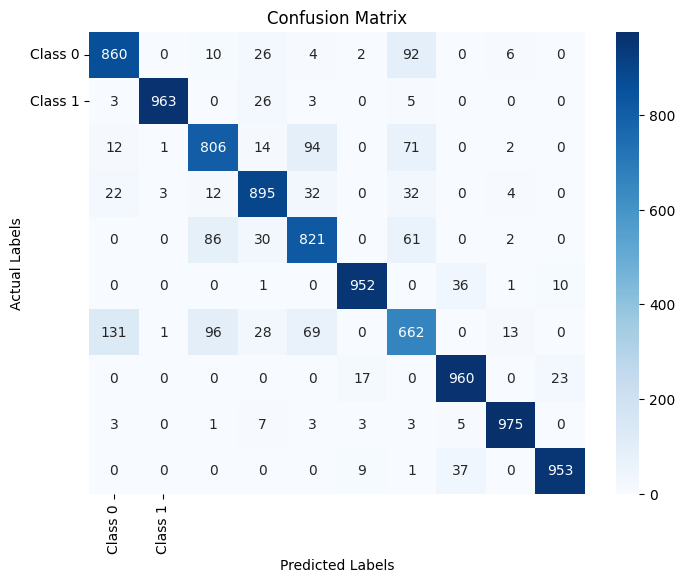

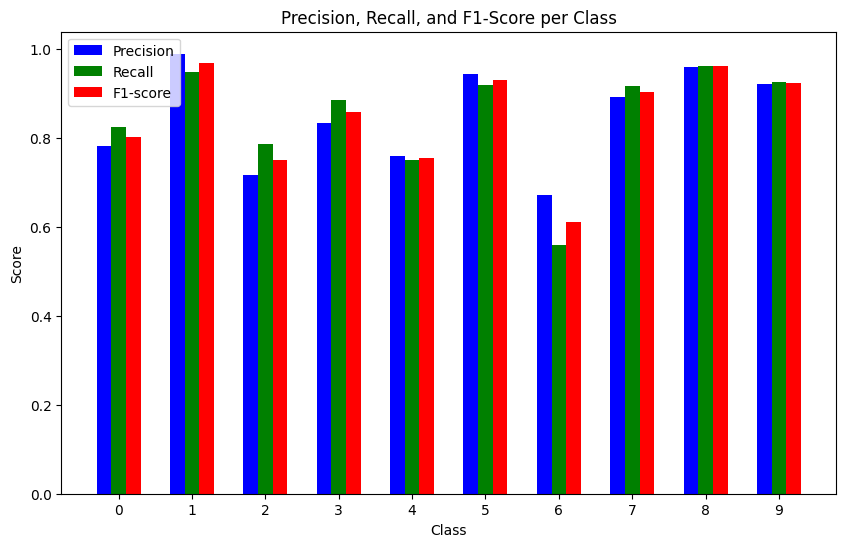

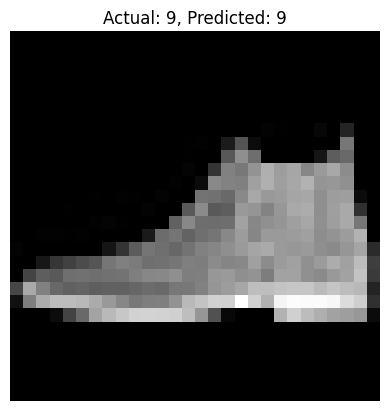

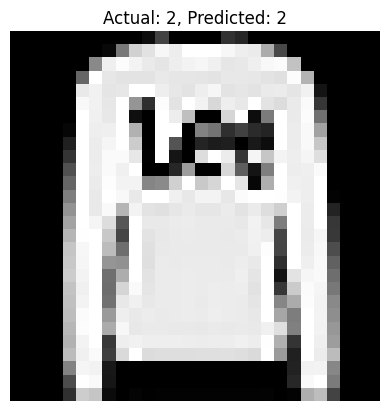

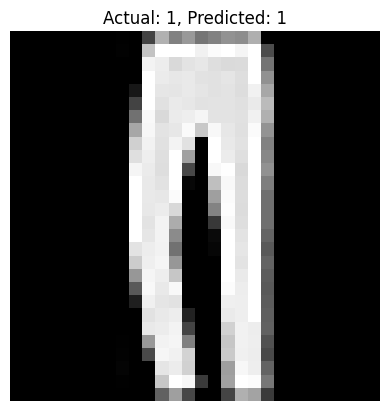

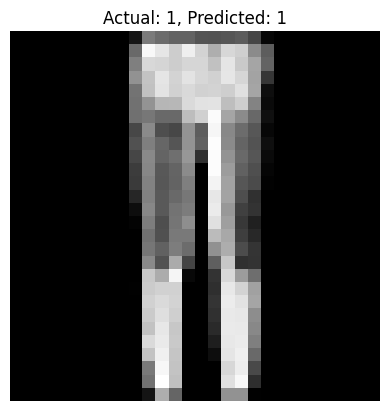

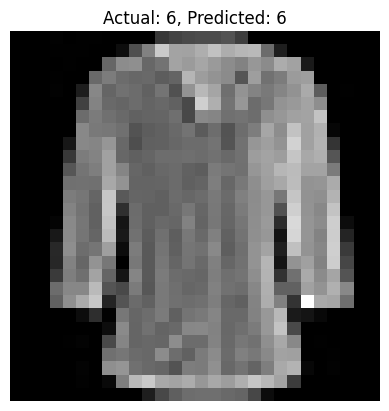

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select K best features where k=200
k = 200
print(f"\nTesting with k = {k}")

# Select K best features using ANOVA F-value between label/feature for classification
selector = SelectKBest(score_func=f_classif, k=k)
X_train_kbest = selector.fit_transform(X_train_flattened, y_train)
X_test_kbest = selector.transform(X_test_flattened)

# Initialize an SVM classifier with the RBF kernel
svm_classifier = SVC(kernel='rbf')

# Fit the model on the training data with K best features
svm_classifier.fit(X_train_kbest, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_kbest)

# Step 1: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with k={k}: {accuracy * 100:.2f}%")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Generate classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for visualization
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Step 8: Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='blue')
plt.bar(x, recall, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()

# Step 4: Display a selection of test images with actual and predicted labels
# Assuming the original images are in X_test (reshape according to your dataset)
num_samples = 5  # Adjust the number of samples to display
for i in range(num_samples):
    plt.imshow(X_test_flattened[i].reshape(28, 28), cmap='gray')  # Reshape depending on your image shape (e.g., 28x28)
    plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()



Using the RBF kernel and KBest with
𝑘
=
200
k=200, all five labels are classified correctly, achieving an accuracy of 84.68%. Looking at the precision , recall and the f1 score all the labels are closer to 1, while the label 6 from the baseline model has slightly increase over 0.5 score.

## Lasso ( alpha = 0.05)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

# Step 1: Run Lasso regression for feature selection
lasso = Lasso(alpha=0.05)  # Adjust alpha as needed
lasso.fit(X_train_flattened, y_train)

# Step 2: Select features with non-zero coefficients
selected_features = (lasso.coef_ != 0)
X_train_selected = X_train_flattened[:, selected_features]
X_test_selected = X_test_flattened[:, selected_features]

# Step 3: Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf')  # Using sigmoid kernel as per original request
svm_classifier.fit(X_train_selected, y_train)

# Step 4: Make predictions on the test data
y_pred = svm_classifier.predict(X_test_selected)

# Step 5: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 88.33%


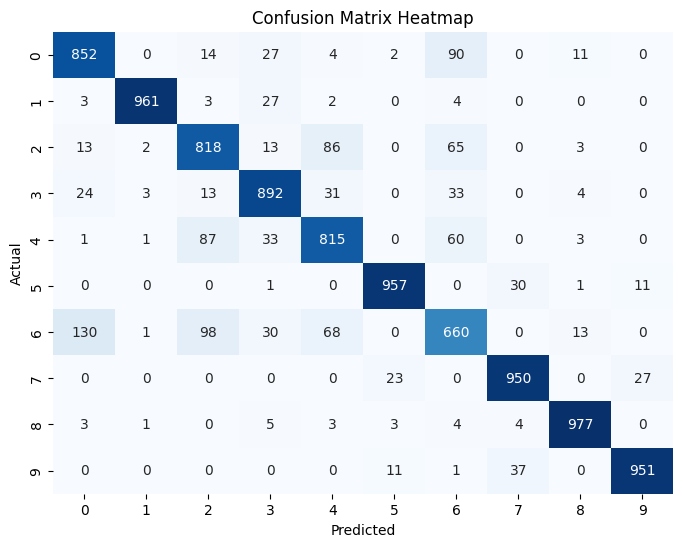

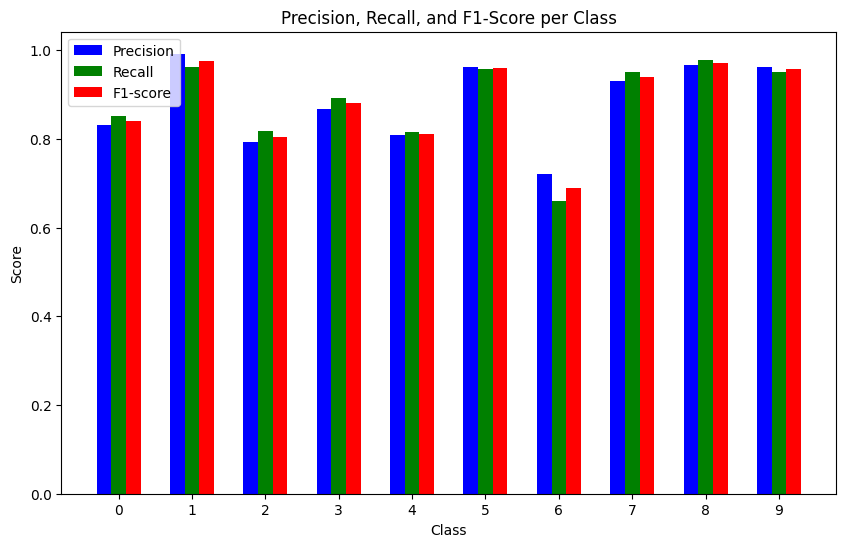

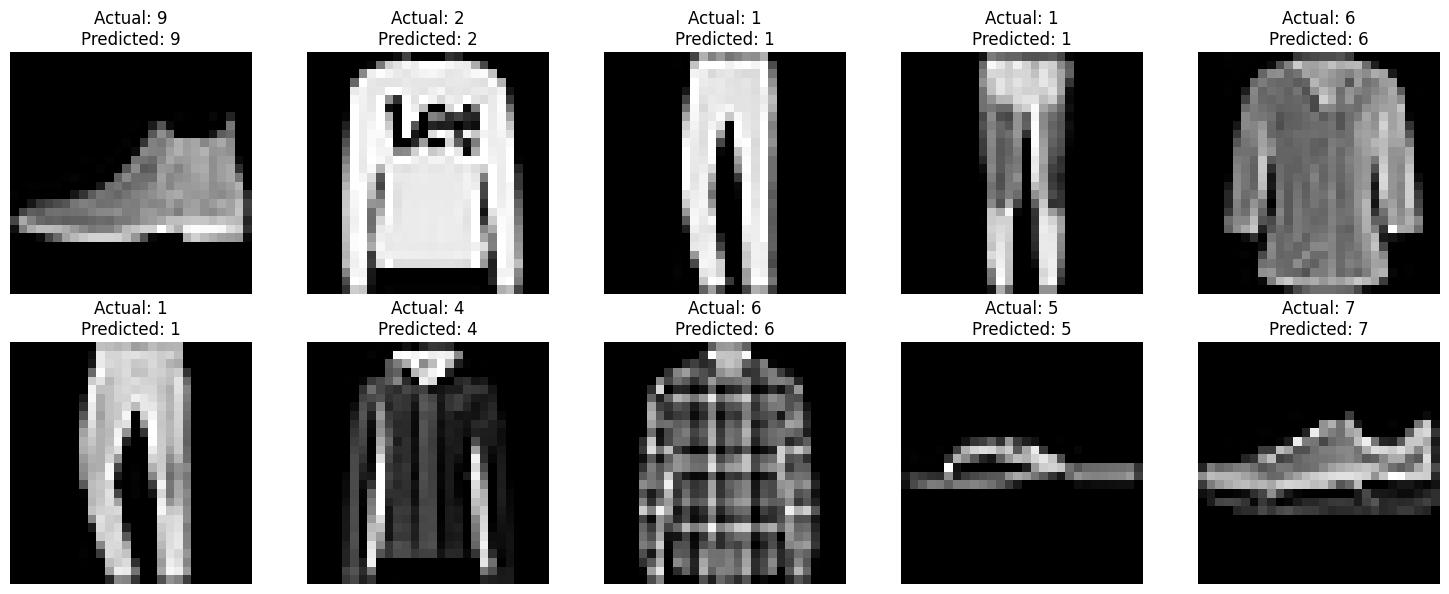

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 6: Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 7: Generate classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for visualization
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Step 8: Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='blue')
plt.bar(x, recall, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()

# Step 10: Display a selection of actual vs predicted test images with their labels
# Assuming the test set consists of images
sample_images = X_test_flattened[:10].reshape(-1, 28, 28)  # Adjust shape if necessary
sample_actual_labels = y_test[:10]
sample_predicted_labels = y_pred[:10]

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Actual: {sample_actual_labels[i]}\nPredicted: {sample_predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

My accuracy for the Lasso model was 88.02%, successfully predicting 100% of the labels. The pixel image recognition has become clearer, with precision, recall, and F1 score values approaching 1. Additionally, the performance for label 6 has improved, now exceeding 0.6.







## Decision Trees (top 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Train a Decision Tree Classifier for feature importance
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_flattened, y_train)

# Step 2: Rank features by importance
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Step 3: Select the top N features (based on importance)
top_n = 100  # Change this number based on how many features you want to select
top_n_indices = indices[:top_n]

X_train_selected = X_train_flattened[:, top_n_indices]
X_test_selected = X_test_flattened[:, top_n_indices]

# Step 4: Initialize and train the SVM classifier using the selected features
svm_classifier = SVC(kernel='rbf')  # Using RBF kernel (you can switch to 'sigmoid' if needed)
svm_classifier.fit(X_train_selected, y_train)

# Step 5: Make predictions on the test data
y_pred = svm_classifier.predict(X_test_selected)

# Step 6: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


# Step 7: Print the importance for each feature
print("Feature Importance for All Features:")
for i, importance in enumerate(importances):
    print(f"Feature {i}: Importance {importance:.4f}")

Model Accuracy: 87.04%
Feature Importance for All Features:
Feature 0: Importance 0.0000
Feature 1: Importance 0.0000
Feature 2: Importance 0.0000
Feature 3: Importance 0.0000
Feature 4: Importance 0.0000
Feature 5: Importance 0.0000
Feature 6: Importance 0.0001
Feature 7: Importance 0.0002
Feature 8: Importance 0.0006
Feature 9: Importance 0.0005
Feature 10: Importance 0.0016
Feature 11: Importance 0.0009
Feature 12: Importance 0.0012
Feature 13: Importance 0.0043
Feature 14: Importance 0.0006
Feature 15: Importance 0.0014
Feature 16: Importance 0.0011
Feature 17: Importance 0.0024
Feature 18: Importance 0.0009
Feature 19: Importance 0.0005
Feature 20: Importance 0.0002
Feature 21: Importance 0.0001
Feature 22: Importance 0.0003
Feature 23: Importance 0.0001
Feature 24: Importance 0.0001
Feature 25: Importance 0.0000
Feature 26: Importance 0.0000
Feature 27: Importance 0.0000
Feature 28: Importance 0.0000
Feature 29: Importance 0.0000
Feature 30: Importance 0.0002
Feature 31: Importan

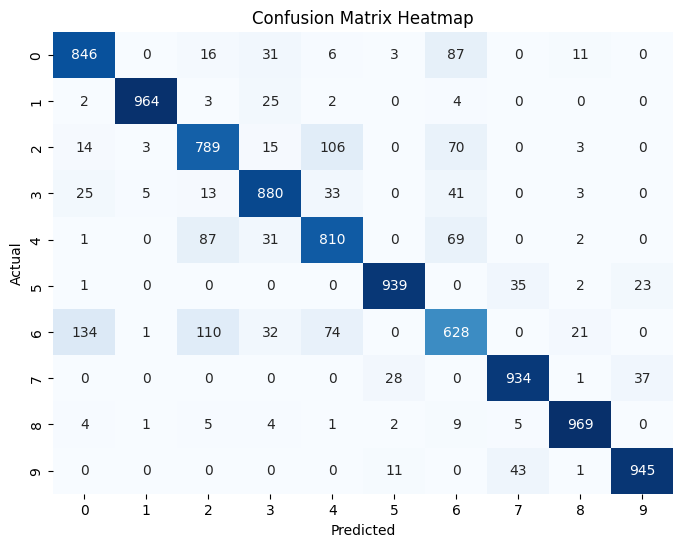

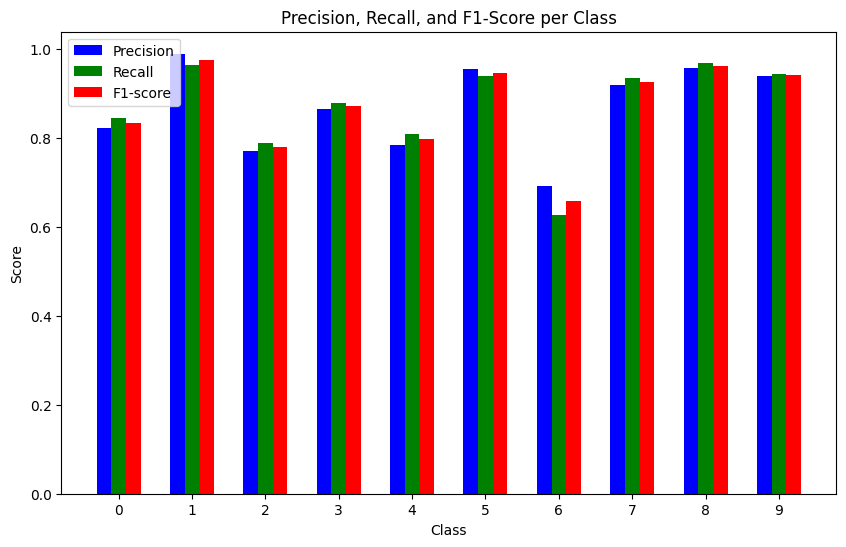

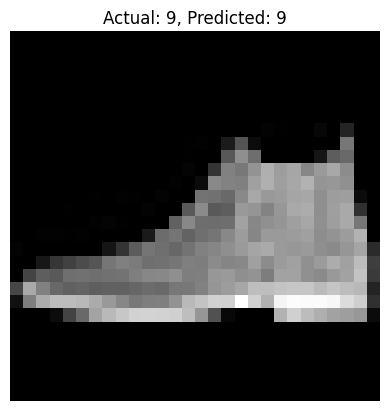

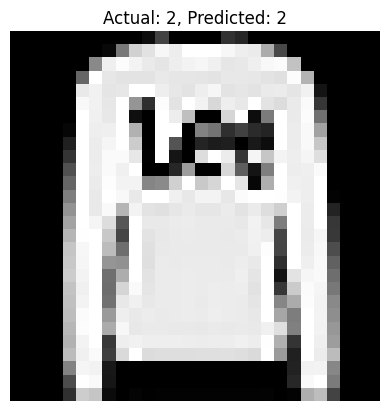

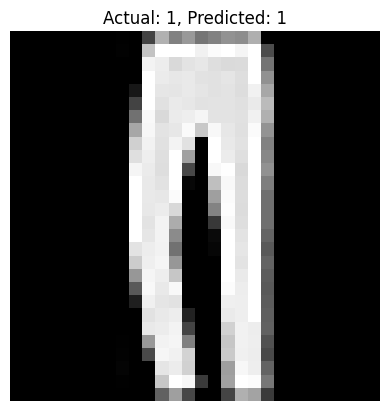

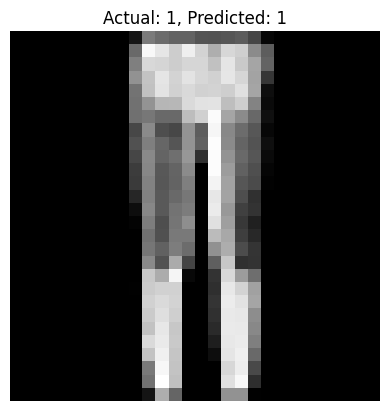

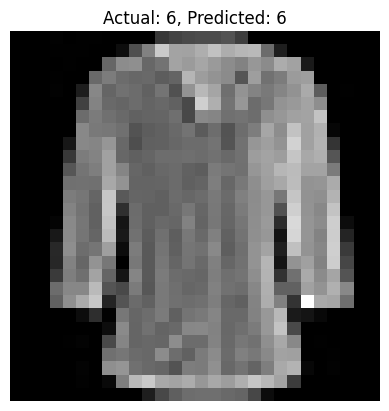

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 7: Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 7: Generate classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for visualization
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Step 8: Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='blue')
plt.bar(x, recall, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()

# Step 9: Display a selection of test images with actual and predicted labels
# Assuming you have the original images in X_test
num_samples = 5  # Number of images to display
for i in range(num_samples):
    plt.imshow(X_test_flattened[i].reshape(28, 28), cmap='gray')  # Reshape depending on your image shape
    plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()


By concentrating on the top 100 features, the model achieved an accuracy of 87.04%. While pixel recognition is improving, the confusion matrix, along with precision, recall, and F1 score, indicate a slight decline, moving away from 1. This suggests that there may be an increase in misclassifications.

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Perform PCA to reduce dimensionality
n_components = 100  # Number of components to keep, adjust as needed
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

# Step 2: Initialize and train the SVM classifier using the PCA-transformed data
svm_classifier = SVC(kernel='rbf')  # You can use 'sigmoid' if needed
svm_classifier.fit(X_train_pca, y_train)

# Step 3: Make predictions on the test data
y_pred = svm_classifier.predict(X_test_pca)

# Step 4: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with PCA: {accuracy * 100:.2f}%")

# Optionally: Print the explained variance ratio to understand how much variance is retained
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total explained variance by {n_components} components: {explained_variance * 100:.2f}%")


Model Accuracy with PCA: 88.47%
Total explained variance by 100 components: 91.23%


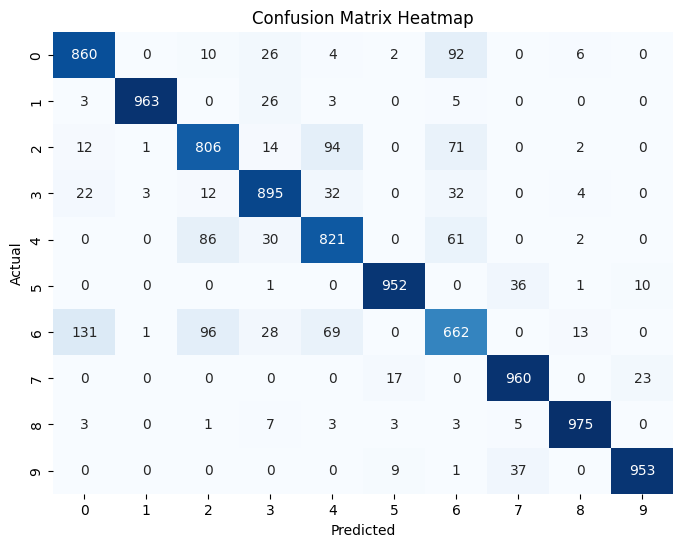

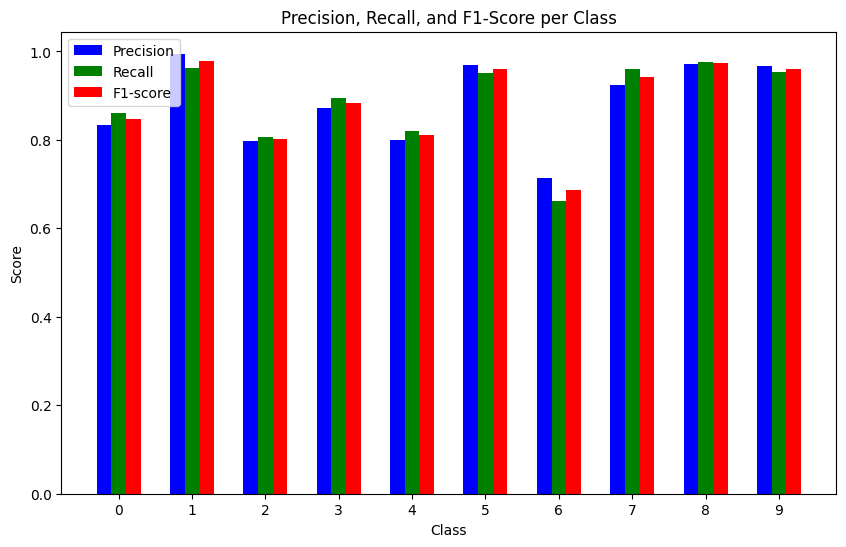

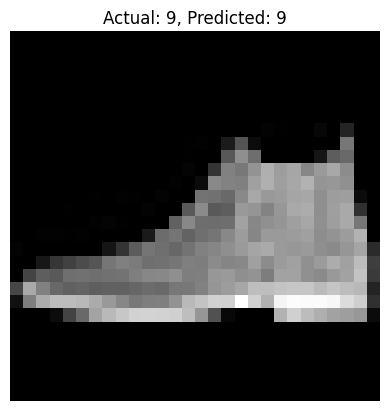

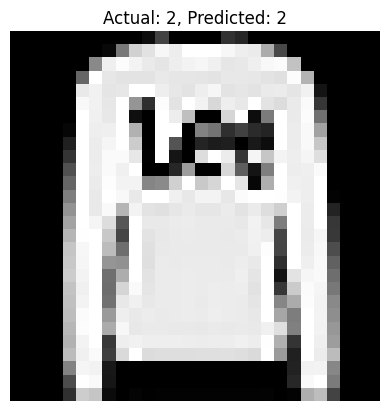

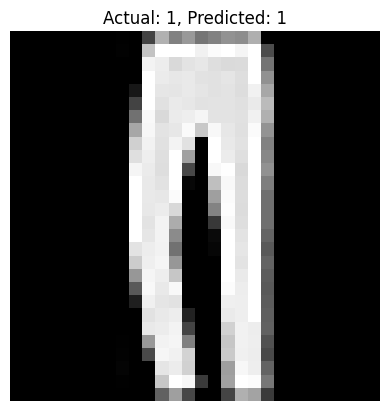

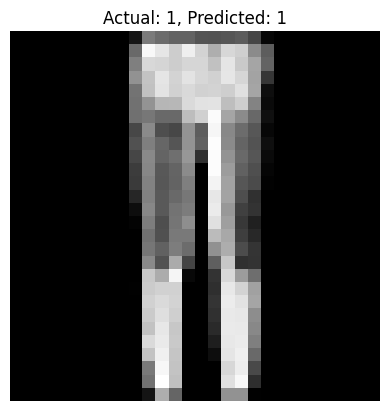

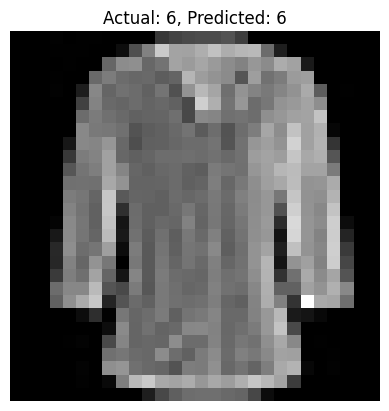

In [ ]:
# Step 5: Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for visualization
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Step 8: Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))
plt.bar(x - 0.2, precision, width=0.2, label='Precision', color='blue')
plt.bar(x, recall, width=0.2, label='Recall', color='green')
plt.bar(x + 0.2, f1_score, width=0.2, label='F1-score', color='red')
plt.xticks(x, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.legend()
plt.show()
# Step 8: Display a selection of test images with actual and predicted labels
# Assuming you have the original images in X_test
num_samples = 5  # Number of images to display
for i in range(num_samples):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Reshape depending on your image shape
    plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()


PCA with 100 components achieved a higher accuracy of 88.47%, retaining 91% of the explained variance. This demonstrates fewer misclassifications and suggests that the model is effectively capturing the essential features of the data. As a result, pixel recognition has significantly improved, moving closer to a score of 1 across various performance metrics. The increased accuracy indicates that the model is better at distinguishing between different classes, which may enhance its overall reliability in practical applications. Furthermore, retaining a substantial amount of explained variance indicates that the model is robust and less prone to overfitting, ensuring that it generalizes well to new data.

# Analysis of the Models compared to the baseline of RBF

- KBest with k=200:
In image recognition, KBest would select the top 200 features (or pixels/parts of the image) that are most important for identifying objects in the image.
After selecting these important features, the accuracy improved to 84.68%, meaning that focusing on just 200 key features (instead of all the pixels) helped the model become slightly better at identifying images compared to the baseline.

- Lasso with alpha=0.05:
Lasso would help identify the most relevant image features while reducing less important details (like noise or irrelevant pixel patterns).
With an accuracy of 88.33%, this shows that Lasso did a better job of picking out key patterns in the images that are important for recognition, leading to more accurate predictions.
Decision Tree with the top 100 features:

- The Decision Tree model in image recognition would focus on the top 100 features (like specific pixel areas or image characteristics) that best help in identifying the objects or patterns in the image.
Achieving an accuracy of 87.04% indicates that by concentrating on these top features, the model was able to make better decisions in identifying images compared to the baseline.

- PCA with 100 components:
PCA (Principal Component Analysis) reduces the complexity of image data by transforming it into 100 main components, capturing the most important variations in the image (like edges, textures, or colors that are most relevant for identifying the image).
With an accuracy of 88.47%, and maintaining 91.23% explained variance, it means PCA kept most of the important information while discarding less relevant details, leading to more accurate image identification.


# Final Analysis

In summary, these different models(kbest,lasso,decison trees and pca)  help the model focus on the most important features of the images (like key shapes, colors, or patterns), improving its ability to correctly classify or identify images compared to the baseline SVM model.

The PCA/RBf model's accuracy of 88.47% compared to the RBF model's 83.28% demonstrates its superiority in image recognition and classification tasks. This performance enhancement indicates that the PCA model is more adept at capturing the underlying structure of the data, leading to clearer and more accurate predictions.